 # TikTok Dataset for EDA, Statistical, and Predictive Modelling


About Dataset
This dataset contains information on TikTok users' reports of videos and comments that include user claims. These reports flag content for moderator review, generating a significant volume of user reports that need timely attention.

TikTok's Predictive Model Development
TikTok is developing a predictive model to determine whether a video contains a claim or offers an opinion. A successful prediction model will help reduce the backlog of user reports and enable more efficient prioritization.

Dataset Purpose
This dataset is intended for exploratory data analysis (EDA), statistical analysis, and predictive modeling. It has been created for pedagogical purposes and aims to facilitate learning and research in data analysis and machine learning.

<p style="color:green;">Variables Explained</p>

<ul>
    <li><strong>claim_status:</strong> Indicates whether the video has been reported for containing a claim or opinion (e.g., 'Reported', 'Not Reported').</li>
    <li><strong>video_id:</strong> Unique identifier for each video.</li>
    <li><strong>video_duration_sec:</strong> Duration of the video in seconds.</li>
    <li><strong>video_transcription_text:</strong> Transcription of the video's audio content.</li>
    <li><strong>verified_status:</strong> Indicates whether the video creator's account is verified (e.g., 'Verified', 'Not Verified').</li>
    <li><strong>author_ban_status:</strong> Indicates if the video's author has been banned (e.g., 'Banned', 'Not Banned').</li>
    <li><strong>video_view_count:</strong> Total number of views the video has received.</li>
    <li><strong>video_like_count:</strong> Total number of likes the video has received.</li>
    <li><strong>video_share_count:</strong> Total number of times the video has been shared.</li>
    <li><strong>video_download_count:</strong> Total number of times the video has been downloaded.</li>
    <li><strong>video_comment_count:</strong> Total number of comments on the video.</li>
</ul>


In [1]:
import numpy as np 
import pandas as  pd 
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline 
from ydata_profiling import ProfileReport


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
Banned_status = pd.read_csv('tiktok_dataset.csv')
Banned_status.head(4)

# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0

In [39]:
print(Banned_status.columns)

Index(['claim_status', 'video_duration_sec', 'verified_status',
       'author_ban_status', 'video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count'],
      dtype='object')


In [3]:
profile = ProfileReport(Banned_status, title=" TikTok Dataset Profiling Report", explorative=True)
profile.to_notebook_iframe()  # For Jupyter notebooks
profile.to_file("your_report.html")  # To save as an HTML file

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
Banned_status.head()

# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

In [5]:
Banned_status.shape

(19382, 12)

In [6]:
print(Banned_status.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB
None


In [7]:
no_values = Banned_status.isnull().sum()
print(f"here we printing the no values {no_values}")

here we printing the no values #                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64


In [8]:
banned_status = Banned_status.isnull().mean()*100
print(f"The percentages of the null values \n {banned_status}")

The percentages of the null values 
 #                           0.000000
claim_status                1.537509
video_id                    0.000000
video_duration_sec          0.000000
video_transcription_text    1.537509
verified_status             0.000000
author_ban_status           0.000000
video_view_count            1.537509
video_like_count            1.537509
video_share_count           1.537509
video_download_count        1.537509
video_comment_count         1.537509
dtype: float64


In [9]:
Banned_status = Banned_status.dropna(subset=['claim_status', 'video_transcription_text', 'video_view_count', 'video_share_count', 'video_download_count', 'video_comment_count'])
Banned_status.head(5)

# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

In [10]:
banned_status = Banned_status.isnull().mean()*100
print(f"Here we remove the null values\n{banned_status}")

Here we remove the null values
#                           0.0
claim_status                0.0
video_id                    0.0
video_duration_sec          0.0
video_transcription_text    0.0
verified_status             0.0
author_ban_status           0.0
video_view_count            0.0
video_like_count            0.0
video_share_count           0.0
video_download_count        0.0
video_comment_count         0.0
dtype: float64


In [11]:
Banned_status.head(10)

# claim_status    video_id  video_duration_sec  \
0   1        claim  7017666017                  59   
1   2        claim  4014381136                  32   
2   3        claim  9859838091                  31   
3   4        claim  1866847991                  25   
4   5        claim  7105231098                  19   
5   6        claim  8972200955                  35   
6   7        claim  4958886992                  16   
7   8        claim  2270982263                  41   
8   9        claim  5235769692                  50   
9  10        claim  4660861094                  45   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   
5  someone shared with me that gross domestic pro...    not verified   
6  someone shared with me that elvis presley has ...    not verified   
7  someone shared with me that the best selling s...    not verified   
8  someone shared with me that about half of the ...    not verified   
9  someone shared with me that it would take a 50...        verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   
5      under review          336647.0          175546.0            62303.0   
6            active          750345.0          486192.0           193911.0   
7            active          547532.0            1072.0               50.0   
8            active           24819.0           10160.0             1050.0   
9            active          931587.0          171051.0            67739.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0  
5                4293.0               1857.0  
6                8616.0               5446.0  
7                  22.0                 11.0  
8                  53.0                 27.0  
9                4104.0               2540.0

In [12]:
# Drop column 'B'
Banned_status = Banned_status.drop(columns=['#','video_transcription_text','video_id'],axis = 1)


In [13]:
Banned_status.head(3)

claim_status  video_duration_sec verified_status author_ban_status  \
0        claim                  59    not verified      under review   
1        claim                  32    not verified            active   
2        claim                  31    not verified            active   

   video_view_count  video_like_count  video_share_count  \
0          343296.0           19425.0              241.0   
1          140877.0           77355.0            19034.0   
2          902185.0           97690.0             2858.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0

In [14]:
Banned_status.shape

(19084, 9)

In [15]:
duplicated = Banned_status.duplicated().sum()
print(f"The total duplicted value  : {duplicated}")

The total duplicted value  : 0


In [16]:
Banned_status.describe()

video_duration_sec  video_view_count  video_like_count  \
count        19084.000000      19084.000000      19084.000000   
mean            32.423811     254708.558688      84304.636030   
std             16.226470     322893.280814     133420.546814   
min              5.000000         20.000000          0.000000   
25%             18.000000       4942.500000        810.750000   
50%             32.000000       9954.500000       3403.500000   
75%             47.000000     504327.000000     125020.000000   
max             60.000000     999817.000000     657830.000000   

       video_share_count  video_download_count  video_comment_count  
count       19084.000000          19084.000000         19084.000000  
mean        16735.248323           1049.429627           349.312146  
std         32036.174350           2004.299894           799.638865  
min             0.000000              0.000000             0.000000  
25%           115.000000              7.000000             1.000000  
50%           717.000000             46.000000             9.000000  
75%         18222.000000           1156.250000           292.000000  
max        256130.000000          14994.000000          9599.000000

In [17]:
Banned_status.describe().corr()

video_duration_sec  video_view_count  video_like_count  \
video_duration_sec              1.000000         -0.280126         -0.196963   
video_view_count               -0.280126          1.000000          0.946406   
video_like_count               -0.196963          0.946406          1.000000   
video_share_count              -0.108763          0.886526          0.987331   
video_download_count            0.754174          0.355943          0.490130   
video_comment_count             0.884133          0.144291          0.275978   

                      video_share_count  video_download_count  \
video_duration_sec            -0.108763              0.754174   
video_view_count               0.886526              0.355943   
video_like_count               0.987331              0.490130   
video_share_count              1.000000              0.570724   
video_download_count           0.570724              1.000000   
video_comment_count            0.367622              0.973010   

                      video_comment_count  
video_duration_sec               0.884133  
video_view_count                 0.144291  
video_like_count                 0.275978  
video_share_count                0.367622  
video_download_count             0.973010  
video_comment_count              1.000000

In [18]:
Banned_status.head(3)

claim_status  video_duration_sec verified_status author_ban_status  \
0        claim                  59    not verified      under review   
1        claim                  32    not verified            active   
2        claim                  31    not verified            active   

   video_view_count  video_like_count  video_share_count  \
0          343296.0           19425.0              241.0   
1          140877.0           77355.0            19034.0   
2          902185.0           97690.0             2858.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0

# EDA

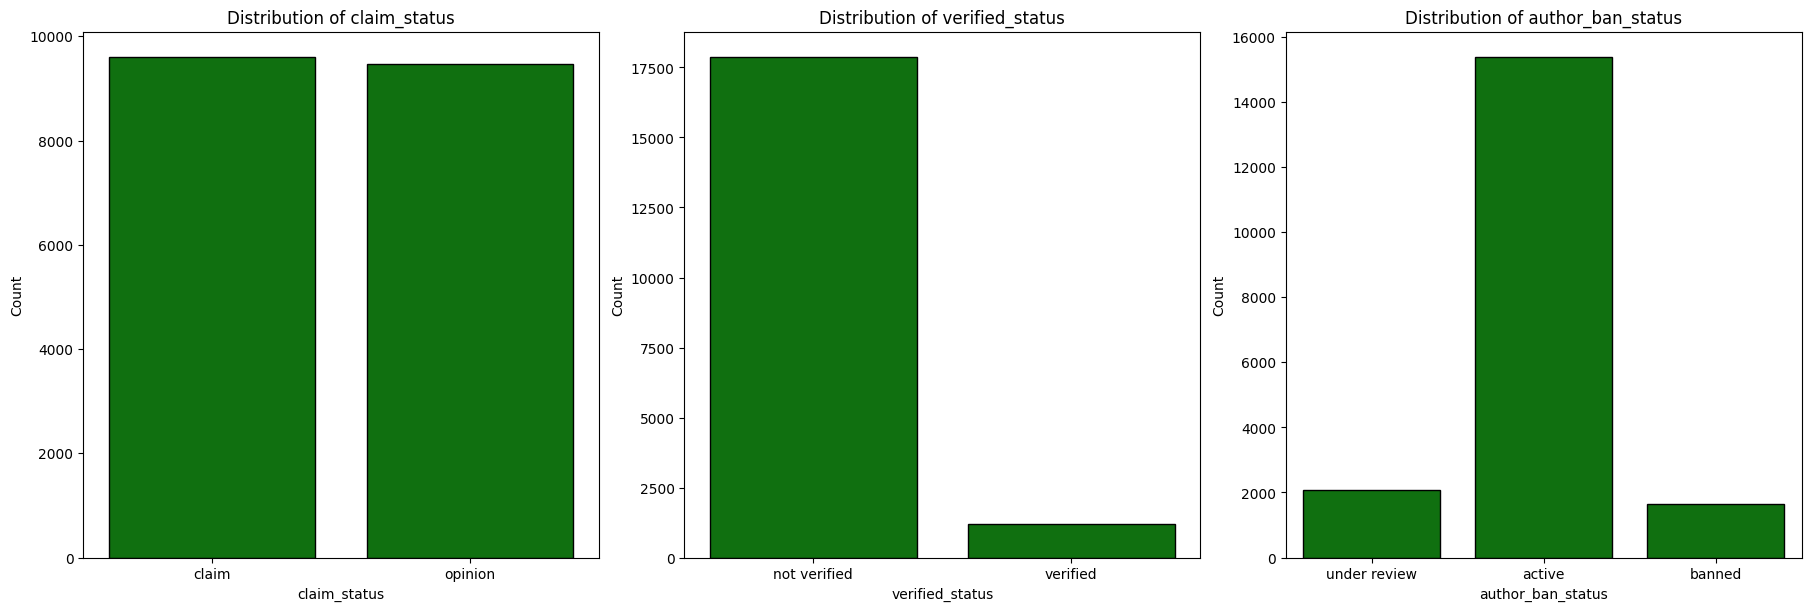

In [19]:
# List of columns to plot
categorical_columns = [
 'claim_status', 'verified_status','author_ban_status',
    
]

# Number of columns for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    sns.countplot(data=Banned_status, x=column, edgecolor='black',color = 'g', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Remove x-axis label
    axes[i].set_ylabel('Count')  # Add y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

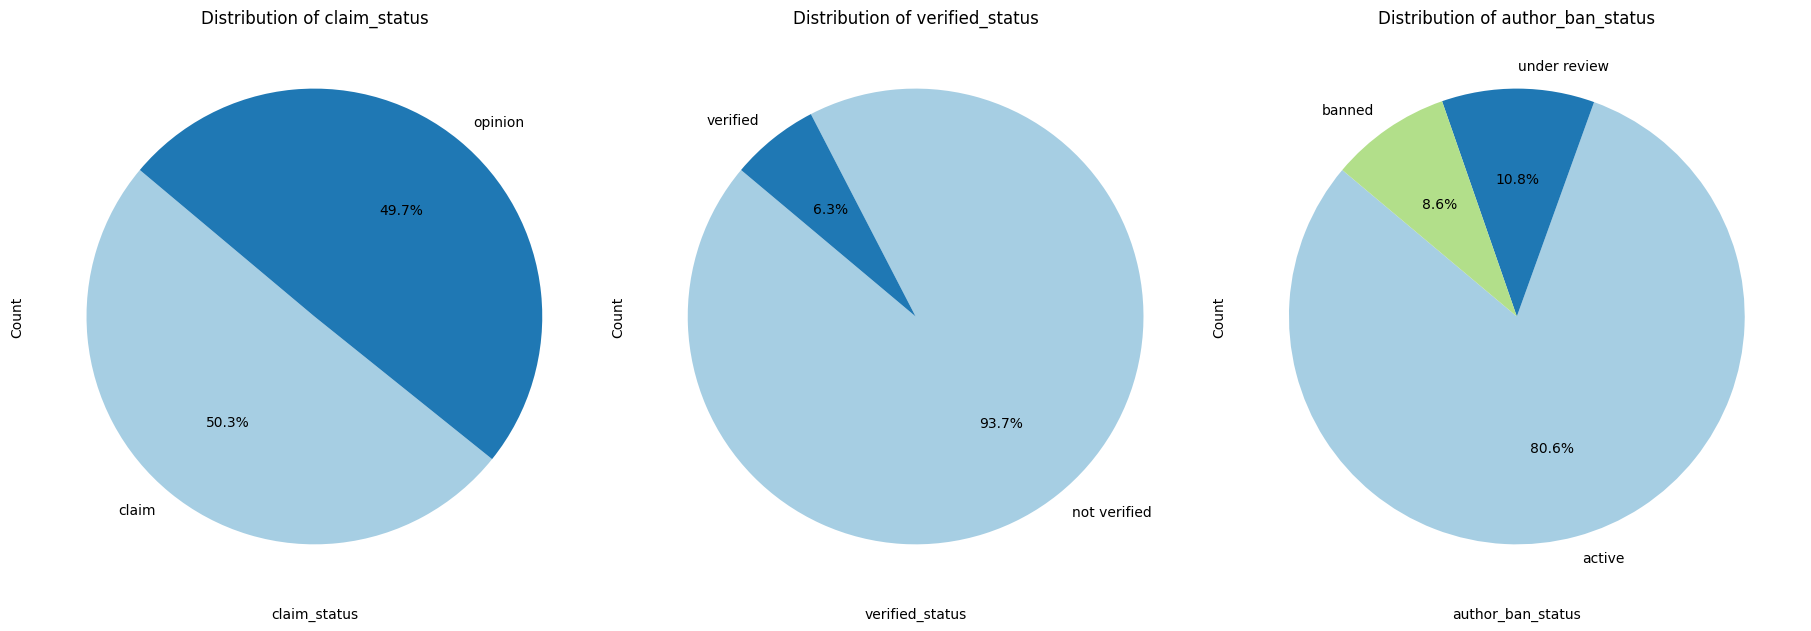

In [20]:

# List of columns to plot
categorical_columns = [
 'claim_status', 'verified_status','author_ban_status',
    
]


# Number of columns for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    # Ensure the column is treated as a categorical variable
    value_counts = Banned_status[column].value_counts()
    
    # Plot pie chart
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(value_counts))))
    axes[i].set_title(f'Distribution of {column}')
    # #  axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Remove x-axis label
    axes[i].set_ylabel('Count') 

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):                                                                                            
    fig.delaxes(axes[j])

plt.show() 

In [21]:
Banned_status.head(6)

claim_status  video_duration_sec verified_status author_ban_status  \
0        claim                  59    not verified      under review   
1        claim                  32    not verified            active   
2        claim                  31    not verified            active   
3        claim                  25    not verified            active   
4        claim                  19    not verified            active   
5        claim                  35    not verified      under review   

   video_view_count  video_like_count  video_share_count  \
0          343296.0           19425.0              241.0   
1          140877.0           77355.0            19034.0   
2          902185.0           97690.0             2858.0   
3          437506.0          239954.0            34812.0   
4           56167.0           34987.0             4110.0   
5          336647.0          175546.0            62303.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0  
5                4293.0               1857.0

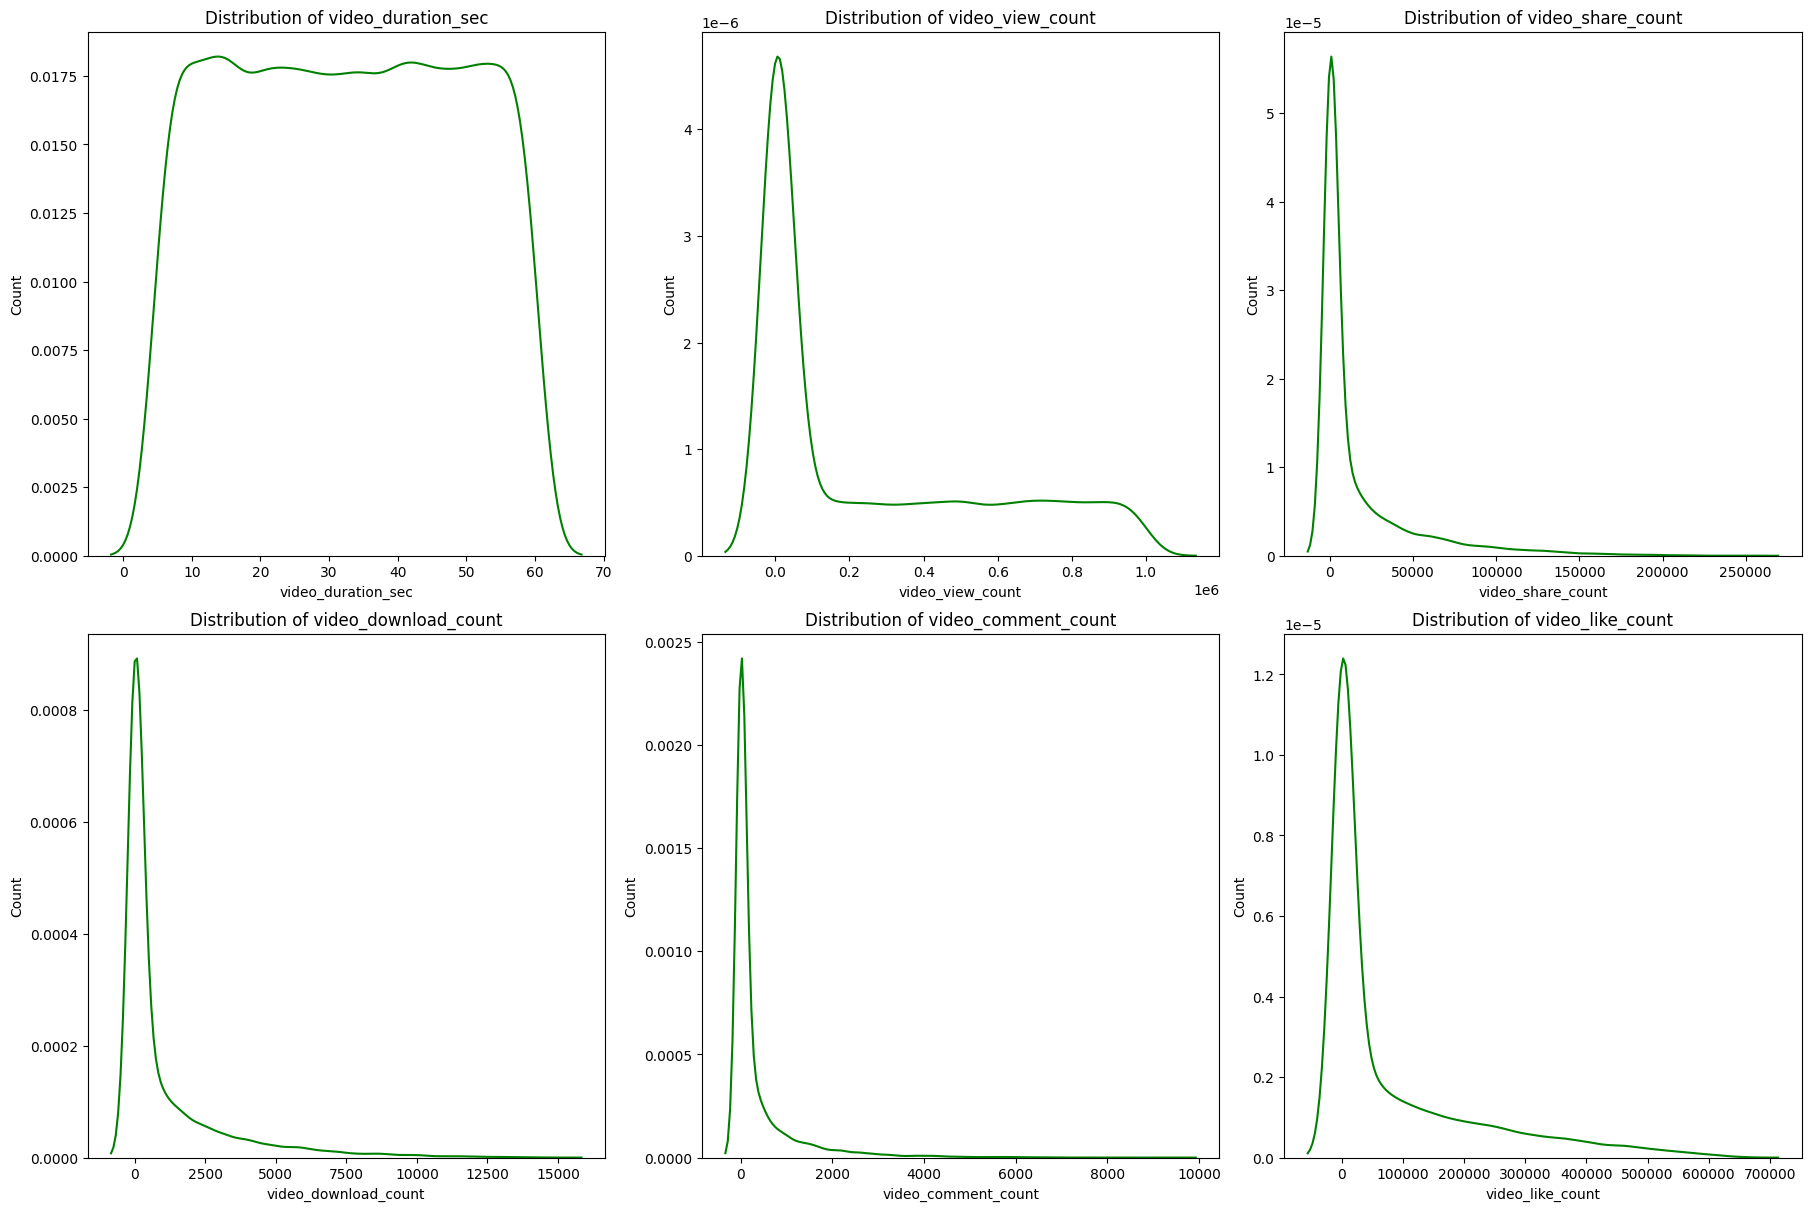

In [22]:
# List of columns to plot
# here in data sets data distibution not good 
categorical_columns = [
 'video_duration_sec', 'video_view_count','video_share_count','video_download_count','video_comment_count','video_like_count'
    
]

# Number of columns for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    sns.kdeplot(data=Banned_status, x=column,color = 'g', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Remove x-axis label
    axes[i].set_ylabel('Count')  # Add y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

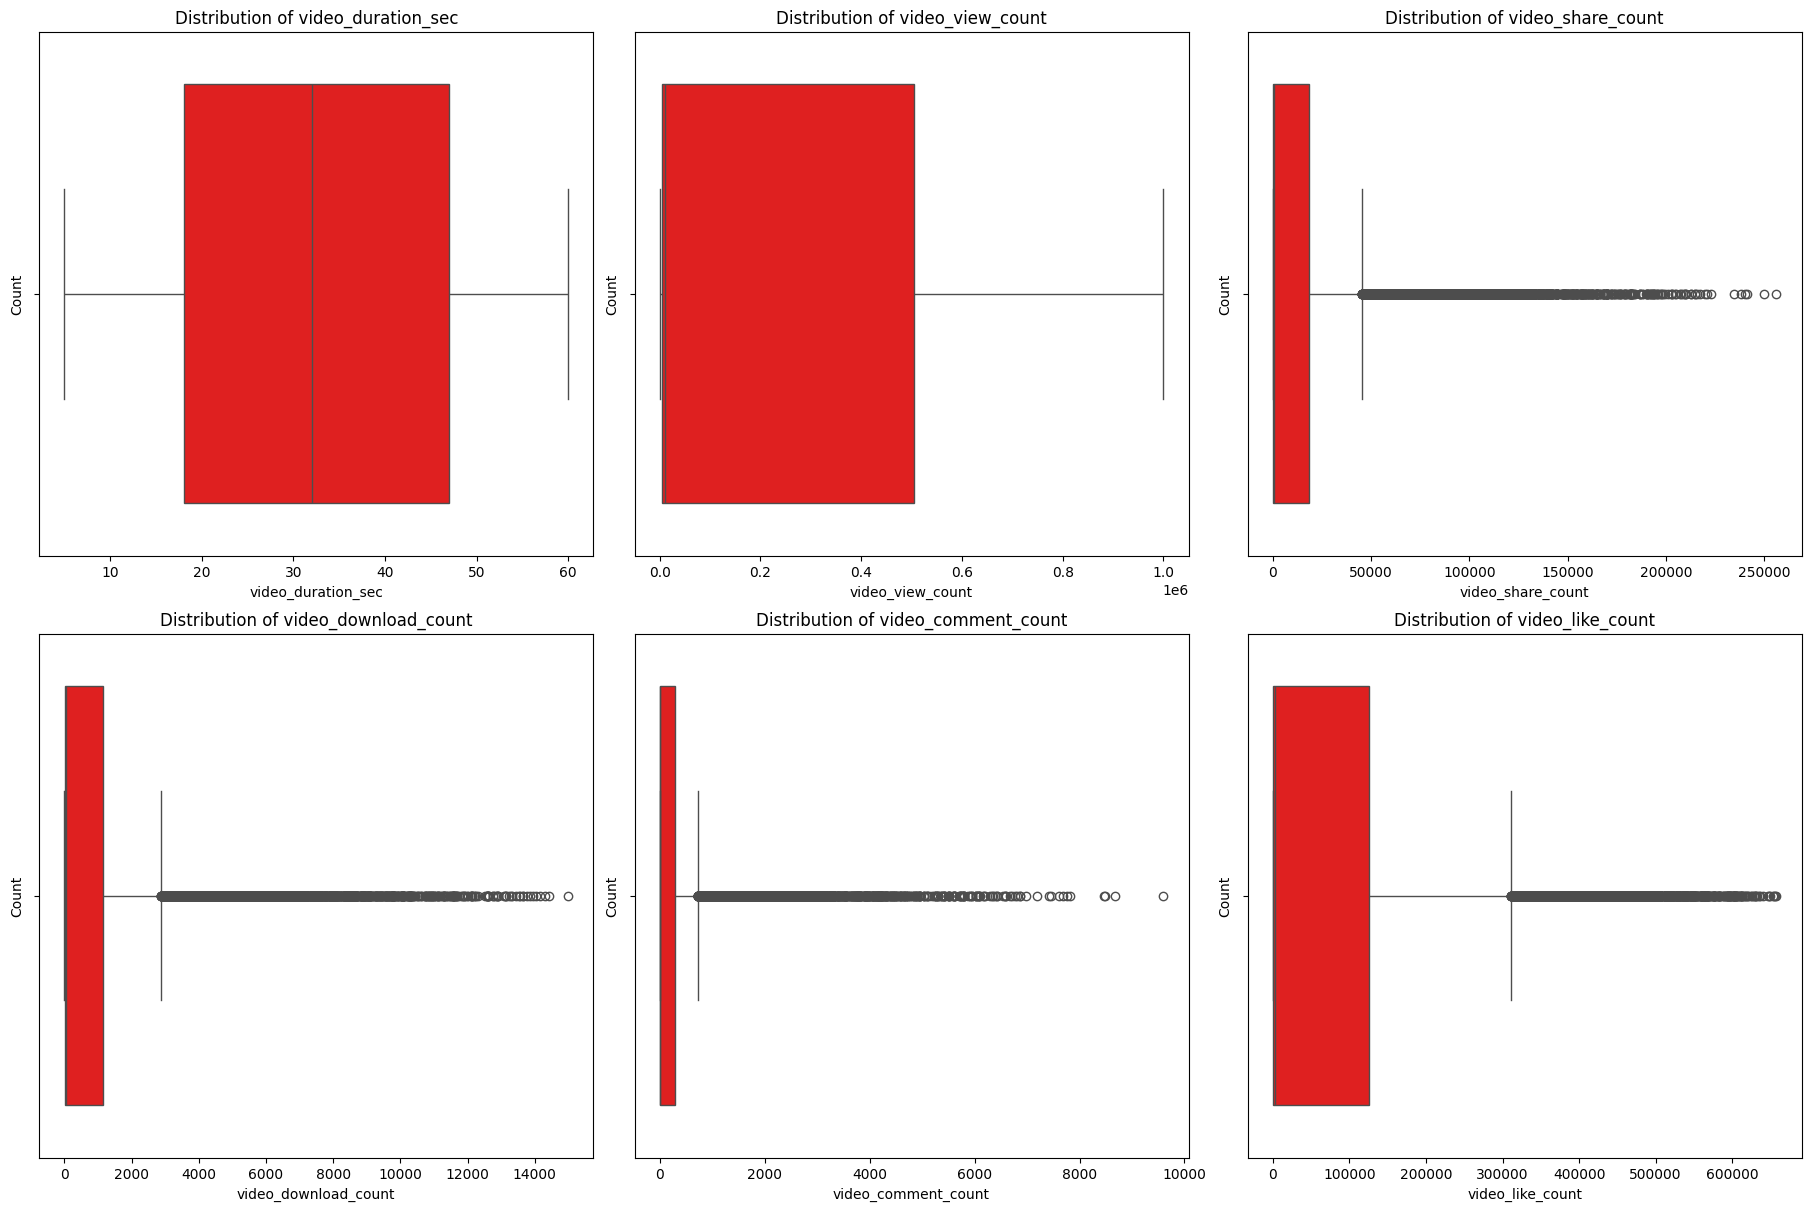

In [23]:
# List of columns to plot
# here in this we have  the outlies in the given datasets
categorical_columns = [
 'video_duration_sec', 'video_view_count','video_share_count','video_download_count','video_comment_count','video_like_count'
    
]

# Number of columns for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    sns.boxplot(data=Banned_status, x=column,color = 'r', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Remove x-axis label
    axes[i].set_ylabel('Count')  # Add y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


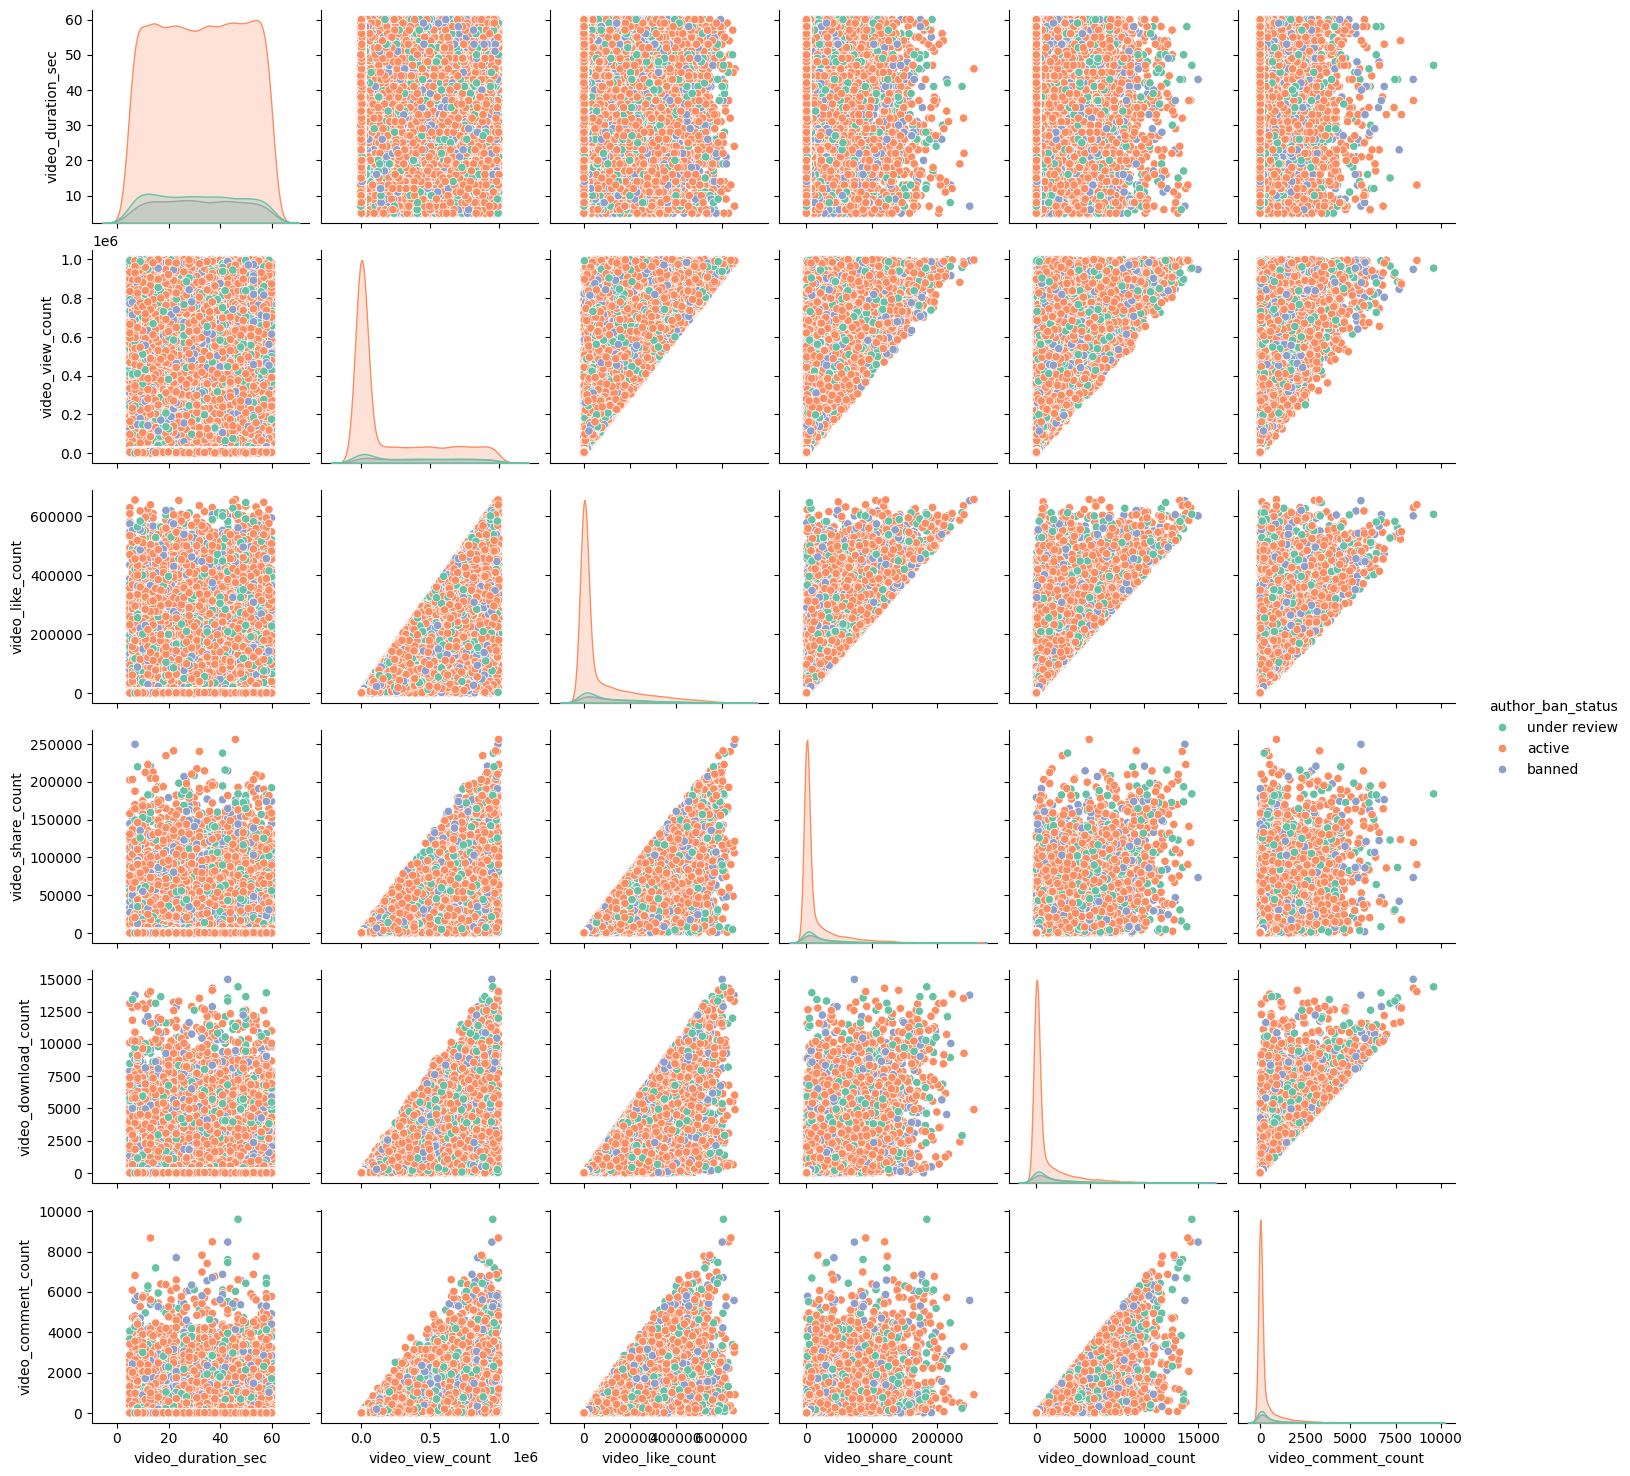

In [24]:
# fist we applying the pair polt
sns.pairplot(Banned_status,hue = 'author_ban_status',palette='Set2')
plt.show()

In [25]:
correlation_matrix =Banned_status.describe().corr()
correlation_matrix

video_duration_sec  video_view_count  video_like_count  \
video_duration_sec              1.000000         -0.280126         -0.196963   
video_view_count               -0.280126          1.000000          0.946406   
video_like_count               -0.196963          0.946406          1.000000   
video_share_count              -0.108763          0.886526          0.987331   
video_download_count            0.754174          0.355943          0.490130   
video_comment_count             0.884133          0.144291          0.275978   

                      video_share_count  video_download_count  \
video_duration_sec            -0.108763              0.754174   
video_view_count               0.886526              0.355943   
video_like_count               0.987331              0.490130   
video_share_count              1.000000              0.570724   
video_download_count           0.570724              1.000000   
video_comment_count            0.367622              0.973010   

                      video_comment_count  
video_duration_sec               0.884133  
video_view_count                 0.144291  
video_like_count                 0.275978  
video_share_count                0.367622  
video_download_count             0.973010  
video_comment_count              1.000000

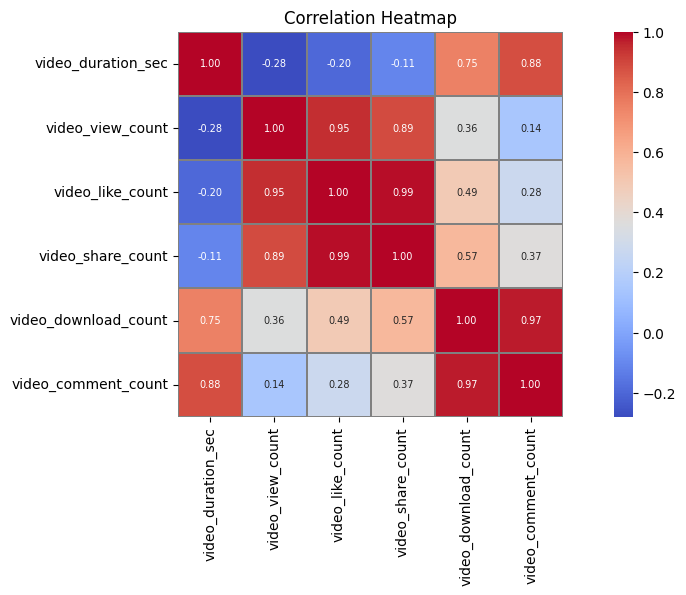

In [26]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,linewidths=0.3,linecolor='gray',annot_kws={"size": 7},fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

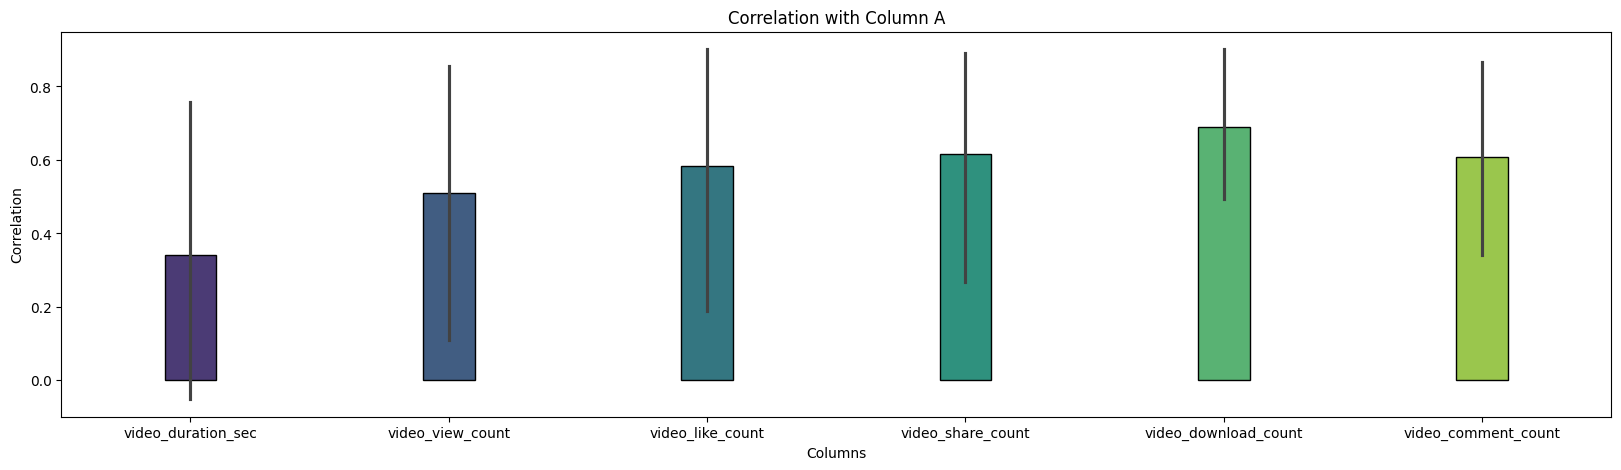

In [27]:
plt.figure(figsize=(20, 5))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(correlation_matrix, palette='viridis',edgecolor='black', linewidth=1,width=0.2)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    
plt.show()

In [28]:
Banned_status.head(5)

claim_status  video_duration_sec verified_status author_ban_status  \
0        claim                  59    not verified      under review   
1        claim                  32    not verified            active   
2        claim                  31    not verified            active   
3        claim                  25    not verified            active   
4        claim                  19    not verified            active   

   video_view_count  video_like_count  video_share_count  \
0          343296.0           19425.0              241.0   
1          140877.0           77355.0            19034.0   
2          902185.0           97690.0             2858.0   
3          437506.0          239954.0            34812.0   
4           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

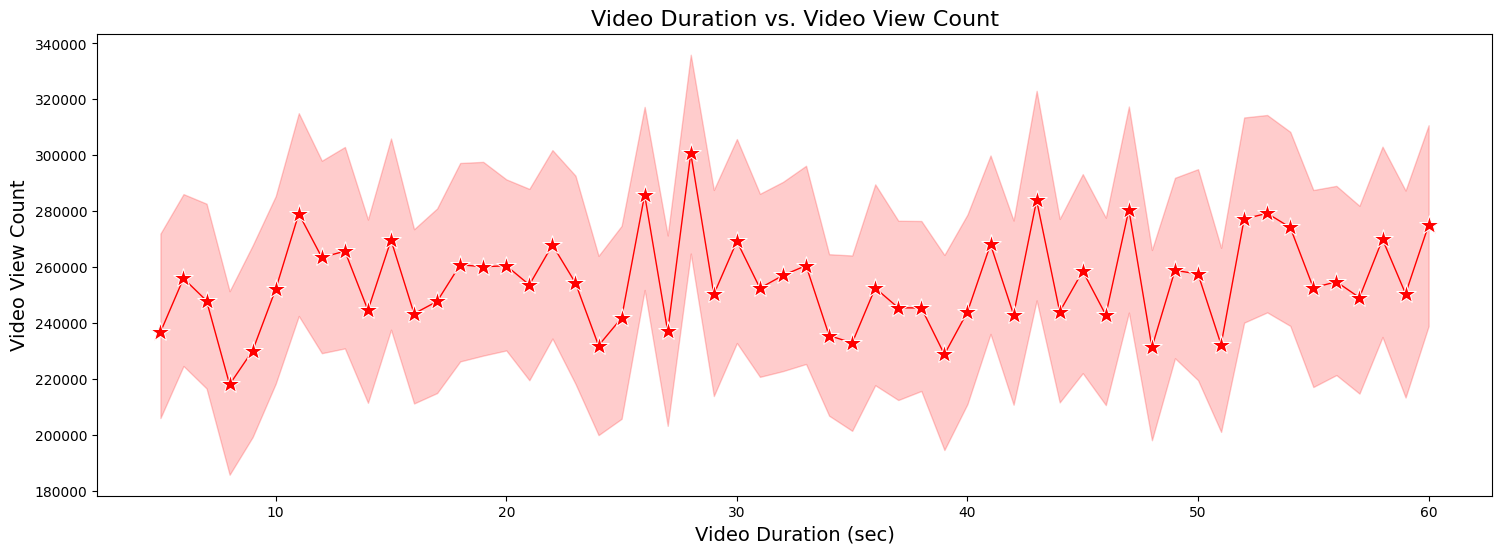

In [29]:
import matplotlib.pyplot as plt

# Assuming Banned_status is a DataFrame and 'video_duration_sec' is one of its columns
plt.figure(figsize=(18, 6))

# Plotting directly from DataFrame
sns.lineplot(x ="video_duration_sec", y = "video_view_count",data = Banned_status,color = 'r',linewidth=1, marker='*', markersize=15)
# plt.show()

# Add titles and labels
plt.title('Video Duration vs. Video View Count', fontsize=16)
plt.xlabel('Video Duration (sec)', fontsize=14)
plt.ylabel('Video View Count', fontsize=14)

plt.show()


In [30]:
Banned_status.head(5)

claim_status  video_duration_sec verified_status author_ban_status  \
0        claim                  59    not verified      under review   
1        claim                  32    not verified            active   
2        claim                  31    not verified            active   
3        claim                  25    not verified            active   
4        claim                  19    not verified            active   

   video_view_count  video_like_count  video_share_count  \
0          343296.0           19425.0              241.0   
1          140877.0           77355.0            19034.0   
2          902185.0           97690.0             2858.0   
3          437506.0          239954.0            34812.0   
4           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

In [31]:
X = Banned_status.drop(columns='author_ban_status')
y = Banned_status['author_ban_status']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
# Define preprocessing for numeric features (imputation + scaling)
numeric_features = ['video_duration_sec', 'video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count']
numeric_transformer = Pipeline(steps=[
    
    ('scaler', StandardScaler())  # Apply scaling
])

# Define preprocessing for categorical features (imputation + one-hot encoding)
categorical_features = ['claim_status','verified_status']
categorical_transformer = Pipeline(steps=[
    
   ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')) # Apply one-hot encoding
])

In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        
        ('num_scaler', numeric_transformer, numeric_features),
        ('cat', categorical_transformer,categorical_features )
    ])

In [68]:
preprocessor

ColumnTransformer(transformers=[('num_scaler',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['video_duration_sec', 'video_view_count',
                                  'video_like_count', 'video_share_count',
                                  'video_download_count',
                                  'video_comment_count']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['claim_status', 'verified_status'])])

In [69]:
# Example with RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])


In [70]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['video_duration_sec',
                                                   'video_view_count',
                                                   'video_like_count',
                                                   'video_share_count',
                                                   'video_download_count',
                                                   'video_comment_count']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['claim_status',
                                                   'verified_status'])])),
                ('classifier', RandomForestClassifier())])

In [71]:
# Assuming X_train, y_train are your training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['video_duration_sec',
                                                   'video_view_count',
                                                   'video_like_count',
                                                   'video_share_count',
                                                   'video_download_count',
                                                   'video_comment_count']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['claim_status',
                                                   'verified_status'])])),
                ('classifier', RandomForestClassifier())])

In [72]:
# Assuming X_test, y_test are your test data
y_pred = pipeline.predict(x_test)

In [74]:
y_pred = pipeline.predict(x_test)


In [75]:
print(y_pred)

['active' 'active' 'active' ... 'active' 'active' 'active']


In [76]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81
